In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

# Global Variables

In [2]:
t=True
f=False

# Load Movies Datarame

In [3]:
movies_df = pd.read_csv('./data/movies.csv')

In [4]:
movies_df.adult.unique()

array([False])

In [5]:
movies_df.drop(['Unnamed: 0'],axis=1,inplace=t)

In [6]:
movies_df.head(5)

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,credits,cast,director
0,False,/i2GVEvltEu3BXn5crBSxgKuTaca.jpg,Insidious Collection,16000000,"Horror, Mystery, Thriller",https://yts-subs.me/insidious-the-red-door-202...,614479,tt13405778,en,Insidious: The Red Door,...,"Español, English",Released,It ends where it all began.,Insidious: The Red Door,False,6.743,542,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","Ty Simpkins, Patrick Wilson, Rose Byrne, Lin S...",Patrick Wilson
1,False,/nHf61UzkfFno5X1ofIhugCPus2R.jpg,NaN,145000000,"Comedy, Adventure, Fantasy",https://www.barbie-themovie.com,346698,tt1517268,en,Barbie,...,English,Released,She's everything. He's just Ken.,Barbie,False,7.500,2379,"{'cast': [{'adult': False, 'gender': 1, 'id': ...","Margot Robbie, Ryan Gosling, America Ferrera, ...",Greta Gerwig
2,False,/yF1eOkaYvwiORauRCPWznV9xVvi.jpg,NaN,190000000,"Action, Adventure, Science Fiction",https://www.dc.com/theflash,298618,tt0439572,en,The Flash,...,"English, Español, Pусский",Released,Worlds collide.,The Flash,False,6.955,2037,"{'cast': [{'adult': False, 'gender': 3, 'id': ...","Ezra Miller, Sasha Calle, Michael Keaton, Mich...",Andy Muschietti
3,False,/2vFuG6bWGyQUzYS9d69E5l85nIz.jpg,Transformers: Rise of the Beasts Collection,195000000,"Action, Adventure, Science Fiction",https://www.transformersmovie.com,667538,tt5090568,en,Transformers: Rise of the Beasts,...,", Español, English",Released,Unite or fall.,Transformers: Rise of the Beasts,False,7.543,2371,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","Anthony Ramos, Dominique Fishback, Peter Culle...",Steven Caple Jr.
4,False,/zN41DPmPhwmgJjHwezALdrdvD0h.jpg,The Meg Collection,129000000,"Action, Science Fiction, Horror",https://www.themeg.movie,615656,tt9224104,en,Meg 2: The Trench,...,English,Released,Back for seconds.,Meg 2: The Trench,False,7.000,135,"{'cast': [{'adult': False, 'gender': 2, 'id': ...","Jason Statham, Wu Jing, Shuya Sophia Cai, Serg...",Ben Wheatley


In [7]:
movies_df.duplicated().sum()

0

In [8]:
movies_df.drop_duplicates(inplace=True)

In [9]:
movies_df.duplicated().sum()

0

In [10]:
movies_df.shape

(12149, 28)

# Which Data Values Containing

In [11]:
movies_df.iloc[0]

adult                                                                False
backdrop_path                             /i2GVEvltEu3BXn5crBSxgKuTaca.jpg
belongs_to_collection                                 Insidious Collection
budget                                                            16000000
genres                                           Horror, Mystery, Thriller
homepage                 https://yts-subs.me/insidious-the-red-door-202...
id                                                                  614479
imdb_id                                                         tt13405778
original_language                                                       en
original_title                                     Insidious: The Red Door
overview                 To put their demons to rest once and for all, ...
popularity                                                        3512.648
poster_path                               /uS1AIL7I1Ycgs8PTfqUeN6jYNsQ.jpg
production_companies     

# Wanted Columns for Model Training

In [12]:
taken_columns = ['id','title','adult','genres','original_language','overview','production_companies','release_date','runtime','tagline','vote_average','vote_count','cast','director']

In [13]:
movies_df = movies_df[taken_columns]
movies_df

,id,title,adult,genres,original_language,overview,production_companies,release_date,runtime,tagline,vote_average,vote_count,cast,director
0,614479,Insidious: The Red Door,False,"Horror, Mystery, Thriller",en,"To put their demons to rest once and for all, ...","Blumhouse Productions, Stage 6 Films, Screen G...",2023-07-05,107,It ends where it all began.,6.743,542,"Ty Simpkins, Patrick Wilson, Rose Byrne, Lin S...",Patrick Wilson
1,346698,Barbie,False,"Comedy, Adventure, Fantasy",en,Barbie and Ken are having the time of their li...,"LuckyChap Entertainment, Heyday Films, NB/GG P...",2023-07-19,114,She's everything. He's just Ken.,7.500,2379,"Margot Robbie, Ryan Gosling, America Ferrera, ...",Greta Gerwig
2,298618,The Flash,False,"Action, Adventure, Science Fiction",en,When his attempt to save his family inadverten...,"Warner Bros. Pictures, Double Dream, The Disco...",2023-06-13,144,Worlds collide.,6.955,2037,"Ezra Miller, Sasha Calle, Michael Keaton, Mich...",Andy Muschietti
3,667538,Transformers: Rise of the Beasts,False,"Action, Adventure, Science Fiction",en,When a new threat capable of destroying the en...,"Skydance, Paramount, di Bonaventura Pictures, ...",2023-06-06,127,Unite or fall.,7.543,2371,"Anthony Ramos, Dominique Fishback, Peter Culle...",Steven Caple Jr.
4,615656,Meg 2: The Trench,False,"Action, Science Fiction, Horror",en,An exploratory dive into the deepest depths of...,"Apelles Entertainment, Warner Bros. Pictures, ...",2023-08-02,116,Back for seconds.,7.000,135,"Jason Statham, Wu Jing, Shuya Sophia Cai, Serg...",Ben Wheatley
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12144,31102,Pollyanna,False,"Comedy, Drama, Family",en,A young girl comes to an embittered town and c...,Walt Disney Productions,1960-05-19,134,NaN,6.976,164,"Hayley Mills, Jane Wyman, Richard Egan, Karl M...",David Swift
12145,529149,Darlin',False,"Horror, Thriller, Mystery",en,Found at a Catholic hospital filthy and feroci...,Hood River Entertainment,2019-09-11,101,Don't mess with mother's nature.,5.425,115,"Lauryn Canny, Bryan Batt, Nora-Jane Noone, Coo...",Pollyanna McIntosh
12146,11462,Suspicion,False,"Mystery, Romance, Thriller",en,"Wealthy, sheltered Lina McLaidlaw is swept off...",RKO Radio Pictures,1941-11-14,99,"In his arms she felt safety...in his absence, ...",7.089,686,"Cary Grant, Joan Fontaine, Cedric Hardwicke, N...",Alfred Hitchcock
12147,791346,DC Showcase: Blue Beetle,False,"Animation, Science Fiction, Action, Adventure",en,SUFFERIN' SCARABS! Silver Age Blue Beetle is b...,"Warner Bros. Animation, DC Entertainment, Warn...",2021-07-27,16,NaN,6.087,23,"Matt Lanter, Jeff Bennett, Ashly Burch, David ...",Milo Neuman


In [14]:
movies_df[(movies_df.id==447365)]

,id,title,adult,genres,original_language,overview,production_companies,release_date,runtime,tagline,vote_average,vote_count,cast,director
9,447365,Guardians of the Galaxy Vol. 3,False,"Science Fiction, Adventure, Action",en,"Peter Quill, still reeling from the loss of Ga...","Marvel Studios, Kevin Feige Productions",2023-05-03,150,Once more with feeling.,8.078,3926,"Chris Pratt, Zoe Saldaña, Dave Bautista, Karen...",James Gunn


# Data Preprocessing

In [15]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12149 entries, 0 to 12148
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    12149 non-null  int64  
 1   title                 12149 non-null  object 
 2   adult                 12149 non-null  bool   
 3   genres                11981 non-null  object 
 4   original_language     12149 non-null  object 
 5   overview              12025 non-null  object 
 6   production_companies  11381 non-null  object 
 7   release_date          12121 non-null  object 
 8   runtime               12149 non-null  int64  
 9   tagline               8653 non-null   object 
 10  vote_average          12149 non-null  float64
 11  vote_count            12149 non-null  int64  
 12  cast                  12033 non-null  object 
 13  director              12054 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(9)
memory usage: 1.3+ MB


In [16]:
movies_df.isnull().sum().sort_values(ascending=False) / movies_df.shape[0] * 100

tagline                 28.776031
production_companies     6.321508
genres                   1.382830
overview                 1.020660
cast                     0.954811
director                 0.781957
release_date             0.230472
id                       0.000000
title                    0.000000
adult                    0.000000
original_language        0.000000
runtime                  0.000000
vote_average             0.000000
vote_count               0.000000
dtype: float64

<AxesSubplot:>

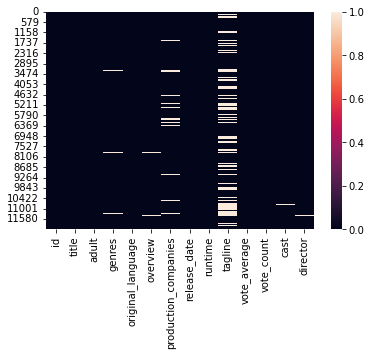

In [17]:
sns.heatmap(movies_df.isnull()) # Black indecating which have not null data

# getting year from release date

In [18]:
movies_df['release_date'][0]

'2023-07-05'

In [19]:
movies_df['release_date'].dtype

dtype('O')

In [20]:
from datetime import datetime

In [21]:
demo_date = '2015-11-20'
demo_date_format = "%Y-%m-%d"
demo_date = datetime.strptime(demo_date,demo_date_format)
print(demo_date.year)

2015


In [22]:
dummy_dates = ['2012-07-16','2019-08-15','2010-03-12','nan','2010-03-12']
dummy_year = []
for i in dummy_dates:
    #print(i)
    if i != 'nan':
        date_year = datetime.strptime(i, "%Y-%m-%d")
        dummy_year.append(date_year.year)
    else:
        dummy_year.append(None)
    
print(dummy_year)

[2012, 2019, 2010, None, 2010]


In [23]:
year = []
for i in movies_df['release_date']:
    if str(i) != 'nan':
        release = datetime.strptime(str(i), "%Y-%m-%d")
        year.append(str(release.year))
    else:
        year.append(None)
# print(year)
movies_df['year'] = year

In [24]:
movies_df.head(3)

,id,title,adult,genres,original_language,overview,production_companies,release_date,runtime,tagline,vote_average,vote_count,cast,director,year
0,614479,Insidious: The Red Door,False,"Horror, Mystery, Thriller",en,"To put their demons to rest once and for all, ...","Blumhouse Productions, Stage 6 Films, Screen G...",2023-07-05,107,It ends where it all began.,6.743,542,"Ty Simpkins, Patrick Wilson, Rose Byrne, Lin S...",Patrick Wilson,2023
1,346698,Barbie,False,"Comedy, Adventure, Fantasy",en,Barbie and Ken are having the time of their li...,"LuckyChap Entertainment, Heyday Films, NB/GG P...",2023-07-19,114,She's everything. He's just Ken.,7.500,2379,"Margot Robbie, Ryan Gosling, America Ferrera, ...",Greta Gerwig,2023
2,298618,The Flash,False,"Action, Adventure, Science Fiction",en,When his attempt to save his family inadverten...,"Warner Bros. Pictures, Double Dream, The Disco...",2023-06-13,144,Worlds collide.,6.955,2037,"Ezra Miller, Sasha Calle, Michael Keaton, Mich...",Andy Muschietti,2023


In [25]:
movies_df['adult'] = movies_df['adult'].apply(lambda x: str(x))

In [26]:
movies_df.rename(columns={"vote_average": "rating"},inplace=True)

# Creating Tags for train ML model

In [27]:
movies_df['tags'] = movies_df['adult']+" "+movies_df['original_language']+" "+movies_df['tagline']+" "+movies_df['cast']+" "+movies_df['director']
movies_df['tags'].head(5)

0    False en It ends where it all began. Ty Simpki...
1    False en She's everything. He's just Ken. Marg...
2    False en Worlds collide. Ezra Miller, Sasha Ca...
3    False en Unite or fall. Anthony Ramos, Dominiq...
4    False en Back for seconds. Jason Statham, Wu J...
Name: tags, dtype: object

In [28]:
movies_ml = movies_df[['id','title','rating','vote_count','year','tags']]
movies_ml.head(5)

,id,title,rating,vote_count,year,tags
0,614479,Insidious: The Red Door,6.743,542,2023,False en It ends where it all began. Ty Simpki...
1,346698,Barbie,7.500,2379,2023,False en She's everything. He's just Ken. Marg...
2,298618,The Flash,6.955,2037,2023,"False en Worlds collide. Ezra Miller, Sasha Ca..."
3,667538,Transformers: Rise of the Beasts,7.543,2371,2023,"False en Unite or fall. Anthony Ramos, Dominiq..."
4,615656,Meg 2: The Trench,7.000,135,2023,"False en Back for seconds. Jason Statham, Wu J..."


# Lower Case tags for creating ml models

In [29]:
movies_ml['tags'] = movies_ml['tags'].apply(lambda x:str(x).lower())
movies_ml['tags'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_13128\2414055689.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['tags'] = movies_ml['tags'].apply(lambda x:str(x).lower())


0    false en it ends where it all began. ty simpki...
1    false en she's everything. he's just ken. marg...
2    false en worlds collide. ezra miller, sasha ca...
3    false en unite or fall. anthony ramos, dominiq...
4    false en back for seconds. jason statham, wu j...
Name: tags, dtype: object

# Tokkenize words

In [30]:
from nltk.tokenize import word_tokenize

In [31]:
movies_ml['tokkens'] = movies_ml['tags'].apply(lambda x: word_tokenize(x))
movies_ml['tokkens'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_13128\482739753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['tokkens'] = movies_ml['tags'].apply(lambda x: word_tokenize(x))


0    [false, en, it, ends, where, it, all, began, ....
1    [false, en, she, 's, everything, ., he, 's, ju...
2    [false, en, worlds, collide, ., ezra, miller, ...
3    [false, en, unite, or, fall, ., anthony, ramos...
4    [false, en, back, for, seconds, ., jason, stat...
Name: tokkens, dtype: object

# removing stop words

In [32]:
from nltk.corpus import stopwords

In [33]:
import string 

In [34]:
stop_words = set(stopwords.words('english'))
special_chars = list(string.punctuation)

In [35]:
def removingStopWords(obj):
    stop_tags = []
    for w in obj:
        if w not in stop_words:
            if w not in special_chars:
                stop_tags.append(w)
    return stop_tags

In [36]:
check = removingStopWords(['this', 'is', 'a', 'sample', 'sentence', ',', 'showing', 'off', 'the', 'stop', 'words', 'filtration', '.'])
check

['sample', 'sentence', 'showing', 'stop', 'words', 'filtration']

In [37]:
movies_ml['without_stopwords'] = movies_ml['tokkens'].apply(removingStopWords)
movies_ml['without_stopwords'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_13128\1221274183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['without_stopwords'] = movies_ml['tokkens'].apply(removingStopWords)


0    [false, en, ends, began, ty, simpkins, patrick...
1    [false, en, 's, everything, 's, ken, margot, r...
2    [false, en, worlds, collide, ezra, miller, sas...
3    [false, en, unite, fall, anthony, ramos, domin...
4    [false, en, back, seconds, jason, statham, wu,...
Name: without_stopwords, dtype: object

# applying steeming

In [38]:
from nltk.stem import WordNetLemmatizer

In [39]:
ls = WordNetLemmatizer()

In [40]:
words = ["program", "programs", "programmer", "programming", "programmers"]

In [41]:
for w in words:
    print(w, " : ", ls.lemmatize(w,pos='v'))

program  :  program
programs  :  program
programmer  :  programmer
programming  :  program
programmers  :  programmers


In [42]:
def stemword(obj):
    stemTxt = []
    for i in obj:
        stemTxt.append(ls.lemmatize(i,pos='v'))
    return stemTxt

In [43]:
check = stemword(["program", "programs", "programmer", "programming", "programmers"])
check

['program', 'program', 'programmer', 'program', 'programmers']

In [44]:
movies_ml['stemming'] = movies_ml['without_stopwords'].apply(stemword)
movies_ml['stemming'].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_13128\3380387142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml['stemming'] = movies_ml['without_stopwords'].apply(stemword)


0    [false, en, end, begin, ty, simpkins, patrick,...
1    [false, en, 's, everything, 's, ken, margot, r...
2    [false, en, worlds, collide, ezra, miller, sas...
3    [false, en, unite, fall, anthony, ramos, domin...
4    [false, en, back, second, jason, statham, wu, ...
Name: stemming, dtype: object

In [45]:
movies_ml.head(5)

,id,title,rating,vote_count,year,tags,tokkens,without_stopwords,stemming
0,614479,Insidious: The Red Door,6.743,542,2023,false en it ends where it all began. ty simpki...,"[false, en, it, ends, where, it, all, began, ....","[false, en, ends, began, ty, simpkins, patrick...","[false, en, end, begin, ty, simpkins, patrick,..."
1,346698,Barbie,7.500,2379,2023,false en she's everything. he's just ken. marg...,"[false, en, she, 's, everything, ., he, 's, ju...","[false, en, 's, everything, 's, ken, margot, r...","[false, en, 's, everything, 's, ken, margot, r..."
2,298618,The Flash,6.955,2037,2023,"false en worlds collide. ezra miller, sasha ca...","[false, en, worlds, collide, ., ezra, miller, ...","[false, en, worlds, collide, ezra, miller, sas...","[false, en, worlds, collide, ezra, miller, sas..."
3,667538,Transformers: Rise of the Beasts,7.543,2371,2023,"false en unite or fall. anthony ramos, dominiq...","[false, en, unite, or, fall, ., anthony, ramos...","[false, en, unite, fall, anthony, ramos, domin...","[false, en, unite, fall, anthony, ramos, domin..."
4,615656,Meg 2: The Trench,7.000,135,2023,"false en back for seconds. jason statham, wu j...","[false, en, back, for, seconds, ., jason, stat...","[false, en, back, seconds, jason, statham, wu,...","[false, en, back, second, jason, statham, wu, ..."


In [46]:
movies_ml["stem_tags"] = movies_ml['stemming'].apply(lambda x: " ".join(x))
movies_ml["stem_tags"].head(5)

C:\Users\navne\AppData\Local\Temp\ipykernel_13128\68345207.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_ml["stem_tags"] = movies_ml['stemming'].apply(lambda x: " ".join(x))


0    false en end begin ty simpkins patrick wilson ...
1    false en 's everything 's ken margot robbie ry...
2    false en worlds collide ezra miller sasha call...
3    false en unite fall anthony ramos dominique fi...
4    false en back second jason statham wu jing shu...
Name: stem_tags, dtype: object

# CountVectoriser // Bag Of Words

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [48]:
cv = CountVectorizer(max_features=5000)

In [49]:
vectors = cv.fit_transform(movies_ml['stem_tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
features = cv.get_feature_names_out()

In [52]:
keyword_recommend = pd.DataFrame(vectors,columns=features)
keyword_recommend

,000,100,50,aaron,abbey,abbie,abbott,abby,abdul,abe,...,zoe,zombie,zooey,zoë,zsolt,zucker,álvarez,ángel,óscar,šerbedžija
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12144,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
keyword_recommend['title'] = movies_ml['title']
keyword_recommend['id'] = movies_ml['id']

In [54]:
keyword_recommend.head(5)

,000,100,50,aaron,abbey,abbie,abbott,abby,abdul,abe,...,zooey,zoë,zsolt,zucker,álvarez,ángel,óscar,šerbedžija,title,id
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Insidious: The Red Door,614479
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Barbie,346698
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,The Flash,298618
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Transformers: Rise of the Beasts,667538
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Meg 2: The Trench,615656


In [55]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [56]:
keyword_recommend.set_index('title',inplace=t)
keyword_recommend.head(5)

000  100  50  aaron  abbey  abbie  abbott  \
title                                                                         
Insidious: The Red Door             0    0   0      0      0      0       0   
Barbie                              0    0   0      1      0      0       0   
The Flash                           0    0   0      0      0      0       0   
Transformers: Rise of the Beasts    0    0   0      0      0      0       0   
Meg 2: The Trench                   0    0   0      0      0      0       0   

                                  abby  abdul  abe  abel  abigail  abraham  \
title                                                                        
Insidious: The Red Door              0      0    0     0        0        0   
Barbie                               0      0    0     0        0        0   
The Flash                            0      0    0     0        0        0   
Transformers: Rise of the Beasts     0      0    0     0        0        0   
Meg 2: The Trench                    0      0    0     0        0        0   

                                  abrahams  abrams  ace  acevedo  ackerman  \
title                                                                        
Insidious: The Red Door                  0       0    0        0         0   
Barbie                                   0       0    0        0         0   
The Flash                                0       0    0        0         0   
Transformers: Rise of the Beasts         0       0    0        0         0   
Meg 2: The Trench                        0       0    0        0         0   

                                  acosta  acres  action  ada  adair  adam  \
title                                                                       
Insidious: The Red Door                1      0       0    0      0     0   
Barbie                                 0      0       0    0      0     5   
The Flash                              0      0       0    0      0     0   
Transformers: Rise of the Beasts       0      0       0    0      0     0   
Meg 2: The Trench                      0      0       0    0      0     0   

                                  adams  adamson  adamthwaite  addison  addy  \
title                                                                          
Insidious: The Red Door               0        0            0        0     0   
Barbie                                0        0            0        0     0   
The Flash                             0        0            0        0     0   
Transformers: Rise of the Beasts      0        0            0        0     0   
Meg 2: The Trench                     0        0            0        0     0   

                                  adele  adewale  adkins  adler  adlon  \
title                                                                    
Insidious: The Red Door               0        0       0      0      0   
Barbie                                0        0       0      0      0   
The Flash                             0        0       0      0      0   
Transformers: Rise of the Beasts      0        0       0      0      0   
Meg 2: The Trench                     0        0       0      0      0   

                                  adrian  adriana  adriano  adrien  adrienne  \
title                                                                          
Insidious: The Red Door                1        0        0       0         0   
Barbie                                 0        0        0       0         0   
The Flash                              0        0        0       0         0   
Transformers: Rise of the Beasts       0        0        0       0         0   
Meg 2: The Trench                      0        0        0       0         0   

                                  adventure  ae  affleck  afraid  agbaje  age  \
title                                                                           
Insidious: The Red Door                   0

# movies recomendation on the basis of tags using cosignSimilarity

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

In [58]:
similarities = cosine_similarity(vectors)

In [59]:
similarities.shape

(12149, 12149)

In [60]:
similarities

array([[1.        , 0.07053601, 0.0433555 , ..., 0.05162257, 0.        ,
        0.09694584],
       [0.07053601, 1.        , 0.15846642, ..., 0.07547319, 0.        ,
        0.14173668],
       [0.0433555 , 0.15846642, 1.        , ..., 0.07441757, 0.        ,
        0.15971914],
       ...,
       [0.05162257, 0.07547319, 0.07441757, ..., 1.        , 0.        ,
        0.03803491],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.09694584, 0.14173668, 0.15971914, ..., 0.03803491, 0.        ,
        1.        ]])

In [61]:
def recommend(movie_id):
    movie_index = movies_ml[movies_ml['id'] == movie_id].index[0]
    distances = similarities[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=t,key=lambda x:x[-1])[1:11]
    movie_count = 0
    for i in movies_list:
        print(f"{movie_count+1}.) => {movies_ml['title'].iloc[i[0]]}")
        movie_count+=1
        print('-----------------------------')

In [62]:
recommend(614479)

1.) => Insidious
-----------------------------
2.) => Insidious: Chapter 2
-----------------------------
3.) => In the Tall Grass
-----------------------------
4.) => Bottle Rocket
-----------------------------
5.) => Hard Candy
-----------------------------
6.) => Around the World in 80 Days
-----------------------------
7.) => Insidious: The Last Key
-----------------------------
8.) => Bridesmaids
-----------------------------
9.) => Tremors 4: The Legend Begins
-----------------------------
10.) => Insidious: Chapter 3
-----------------------------


# movies recomendation on the basis of tags using knn

In [63]:
title_dataframe = pd.DataFrame(keyword_recommend.index)
title_dataframe.head(5)

,title
0,Insidious: The Red Door
1,Barbie
2,The Flash
3,Transformers: Rise of the Beasts
4,Meg 2: The Trench


In [64]:
from sklearn.neighbors import NearestNeighbors

In [65]:
tags_knn = NearestNeighbors()

In [66]:
tags_knn.fit(keyword_recommend)

NearestNeighbors()

In [67]:
find_movie_name = keyword_recommend[(keyword_recommend['id']==447365)].index[0]
ind_movie_index = title_dataframe[(title_dataframe.title == find_movie_name)].index[0]
distance, index = tags_knn.kneighbors(keyword_recommend.iloc[[ind_movie_index]],n_neighbors=10+1)
index

array([[   9, 1826, 1147, 5206, 1821,    6, 3598, 2461, 4019, 9181, 5602]],
      dtype=int64)

In [68]:
rec_movie_name = []
for i in index[0]:
    rec_movie_name.append(title_dataframe['title'].iloc[[i]].values)
rec_movie_name = np.ravel(rec_movie_name).tolist()
print(rec_movie_name[1:])

['Life in a Year', 'A Quiet Place', 'X-Men: The Mutant Watch', 'Pokémon Detective Pikachu', 'The Little Mermaid', 'Snow White', 'Skyscraper', 'Kickboxer: Retaliation', 'Inuyashiki', 'Adult Only Institute']


In [69]:
rec_movie_name[1:]

['Life in a Year',
 'A Quiet Place',
 'X-Men: The Mutant Watch',
 'Pokémon Detective Pikachu',
 'The Little Mermaid',
 'Snow White',
 'Skyscraper',
 'Kickboxer: Retaliation',
 'Inuyashiki',
 'Adult Only Institute']

# movie recommend on the basis of rating using KNN

In [70]:
ratings = pd.pivot_table(movies_ml,index="title",columns="vote_count",values="rating",aggfunc="sum",fill_value=0)
ratings.head(5)

vote_count                    0      1      2      3      4      5      6      \
title                                                                           
#Alive                            0    0.0    0.0    0.0    0.0    0.0    0.0   
#realityhigh                      0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer              0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included           0    0.0    0.0    0.0    0.0    0.0    0.0   
...And Give Us Our Daily Sex      0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                    7      8      9      10     11     12     13     \
title                                                                           
#Alive                          0.0    0.0    0.0    0.0    0.0    0.0    0.0   
#realityhigh                    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer            0.0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included         0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...And Give Us Our Daily Sex    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                    14     15     16     17     18     19     20     \
title                                                                           
#Alive                          0.0    0.0    0.0    0.0  0.000    0.0    0.0   
#realityhigh                    0.0    0.0    0.0    0.0  0.000    0.0    0.0   
(500) Days of Summer            0.0    0.0    0.0    0.0  0.000    0.0    0.0   
*batteries not included         0.0    0.0    0.0    0.0  0.000    0.0    0.0   
...And Give Us Our Daily Sex    0.0    0.0    0.0    0.0  5.917    0.0    0.0   

vote_count                    21     22     23     24     25     26     27     \
title                                                                           
#Alive                          0.0    0.0    0.0    0.0    0.0    0.0    0.0   
#realityhigh                    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer            0.0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included         0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...And Give Us Our Daily Sex    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                    28     29     30     31     32     33     34     \
title                                                                           
#Alive                          0.0    0.0    0.0    0.0    0.0    0.0    0.0   
#realityhigh                    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer            0.0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included         0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...And Give Us Our Daily Sex    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                    35     36     37     38     39     40     41     \
title                                                                           
#Alive                          0.0    0.0    0.0    0.0    0.0    0.0    0.0   
#realityhigh                    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer            0.0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included         0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...And Give Us Our Daily Sex    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count                    42     43     44     45     46     47     48     \
title                                                                           
#Alive                          0.0    0.0    0.0    0.0    0.0    0.0    0.0   
#realityhigh                    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
(500) Days of Summer            0.0    0.0    0.0    0.0    0.0    0.0    0.0   
*batteries not included         0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...And Give Us Our Daily Sex    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

vote_count              

In [71]:
rating_movie_list = pd.DataFrame(ratings.index)

In [72]:
ratings.shape

(11713, 3560)

In [73]:
from sklearn.neighbors import NearestNeighbors

In [74]:
rating_knn = NearestNeighbors()

In [75]:
rating_knn.fit(ratings)

NearestNeighbors()

In [76]:
rate_distance,rate_index = rating_knn.kneighbors(ratings.iloc[[rating_movie_list[(rating_movie_list['title'] == '(500) Days of Summer')].index[0]]],n_neighbors=11)
rate_index

array([[    2,  5188,  5215,  5087, 11489,  1014, 10370,   389,  5005,
         5239,  5257]], dtype=int64)

In [77]:
rate_index[0].tolist()

[2, 5188, 5215, 5087, 11489, 1014, 10370, 389, 5005, 5239, 5257]

In [78]:
count_new = 0
for i in rate_index[0].tolist():
    if count_new == 0:
        pass
    else:
        print(f"{count_new}.) => {ratings.iloc[[i]].index[0]} => {movies_ml['rating'].iloc[[i]].values} having movie_id => {i}")
    count_new+=1

1.) => Lomad => [7.244] having movie_id => 5188
2.) => Loose Women 2 => [6.] having movie_id => 5215
3.) => Let's Go To The Rose Motel 4 => [3.] having movie_id => 5087
4.) => Wringer => [7.496] having movie_id => 11489
5.) => BananaTheMovie: O FILME => [4.7] having movie_id => 1014
6.) => The Three Musketeers: Milady => [7.344] having movie_id => 10370
7.) => About a Cow => [7.103] having movie_id => 389
8.) => Late Bloomers => [5.7] having movie_id => 5005
9.) => Lovano Supreme => [6.979] having movie_id => 5239
10.) => Love Lingers => [5.707] having movie_id => 5257
